# Log 0.9
1. double the number of nodes in each layer
2. better results again, but not great results,  still overfitting after 4 epochs
3. Idea: try to double the number of nodes again, 


In [1]:
# load features and labels
import keras
#keras.__version__ 2.4.3
import numpy as np

train_features = np.load("saved_train_features.npy");
validation_features = np.load("saved_validation_features.npy");
test_features = np.load("saved_test_features.npy");
train_labels = np.load("saved_train_labels.npy");
validation_labels = np.load("saved_validation_labels.npy");
test_labels = np.load("saved_test_labels.npy");


In [2]:
# build network and print summary
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2*16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [3]:
# train and save model
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

model.save('trash-classifier-0-9.h5')

Epoch 1/100
58/58 [==============================] - 4s 60ms/step - loss: 2.9066 - acc: 0.1690 - val_loss: 2.6631 - val_acc: 0.3326
Epoch 2/100
58/58 [==============================] - 3s 58ms/step - loss: 2.7061 - acc: 0.1767 - val_loss: 2.5710 - val_acc: 0.2859
Epoch 3/100
58/58 [==============================] - 4s 65ms/step - loss: 2.6000 - acc: 0.1948 - val_loss: 2.5017 - val_acc: 0.3565
Epoch 4/100
58/58 [==============================] - 3s 60ms/step - loss: 2.5084 - acc: 0.2216 - val_loss: 2.4035 - val_acc: 0.3543
Epoch 5/100
58/58 [==============================] - 3s 58ms/step - loss: 2.4387 - acc: 0.2259 - val_loss: 2.3531 - val_acc: 0.2859
Epoch 6/100
58/58 [==============================] - 4s 70ms/step - loss: 2.3914 - acc: 0.2319 - val_loss: 2.3194 - val_acc: 0.2913
Epoch 7/100
58/58 [==============================] - 4s 64ms/step - loss: 2.3354 - acc: 0.2284 - val_loss: 2.2818 - val_acc: 0.2989
Epoch 8/100
58/58 [==============================] - 4s 72ms/step - loss: 2.

58/58 [==============================] - 5s 92ms/step - loss: 0.8080 - acc: 0.8293 - val_loss: 1.3723 - val_acc: 0.7065
Epoch 63/100
58/58 [==============================] - 4s 66ms/step - loss: 0.7574 - acc: 0.8595 - val_loss: 1.3435 - val_acc: 0.7217
Epoch 64/100
58/58 [==============================] - 4s 69ms/step - loss: 0.7667 - acc: 0.8569 - val_loss: 1.3311 - val_acc: 0.7348
Epoch 65/100
58/58 [==============================] - 5s 82ms/step - loss: 0.7655 - acc: 0.8552 - val_loss: 1.3562 - val_acc: 0.7261
Epoch 66/100
58/58 [==============================] - 3s 60ms/step - loss: 0.7729 - acc: 0.8466 - val_loss: 1.3858 - val_acc: 0.7380
Epoch 67/100
58/58 [==============================] - 4s 62ms/step - loss: 0.7628 - acc: 0.8543 - val_loss: 1.4776 - val_acc: 0.6837
Epoch 68/100
58/58 [==============================] - 4s 71ms/step - loss: 0.7278 - acc: 0.8690 - val_loss: 1.3804 - val_acc: 0.7261
Epoch 69/100
58/58 [==============================] - 4s 64ms/step - loss: 0.7324 

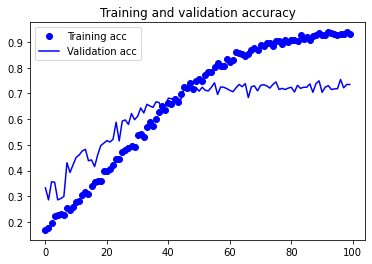

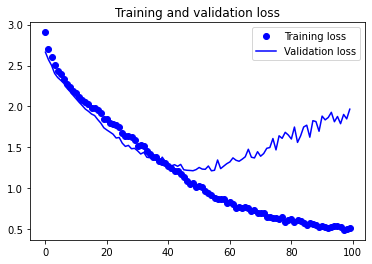

In [4]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()